In [1]:
# import necessary libraries
import pandas as pd

In [2]:
# specify the path for the dataset
Path='/content/drive/MyDrive/Colab Notebooks/data/churn_dataset.csv'

In [3]:
# read the data
df=pd.read_csv(Path)

In [4]:
# get the shape of the data frame
df.shape

(7043, 21)

In [5]:
# get the column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# get the first 5 rows from the dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# checking the datatype and the missing values in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observation:  
* There are total entries of 7043 and 21 columns in the given data frame.  
* All the column names are proper.  
* There are no missing values in the data.
* There are no special characters in the data.
* All the columns have the appropriate data type except for TotalCharges where the values are numeric but the data type is object.

In [8]:
# clear the non numeric values 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [9]:
# finding the number of missing values in Total Charges
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [10]:
# calculate mean
df['TotalCharges'].mean()

2283.3004408418656

In [11]:
# calculate median
df['TotalCharges'].median()

1397.475

There is a variation between mean and median of the Total Charges.This indicates that there are outliers in the data.Hence replace the missing values of Total Charges with median.

In [12]:
# replacing the missing values with median
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

In [13]:
# All the missing values are replaced with median 
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


# Univariate Analysis:

**Analysis for customerID:**

In [14]:
# get the count of unique values in customer id
df['customerID'].value_counts()

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

Observation:  
* The customerID shows the unique id of each customer.  
* There are no duplicate values in the customerID.

**Analysis for gender:**

In [15]:
# get the count of unique values in gender
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<Axes: >

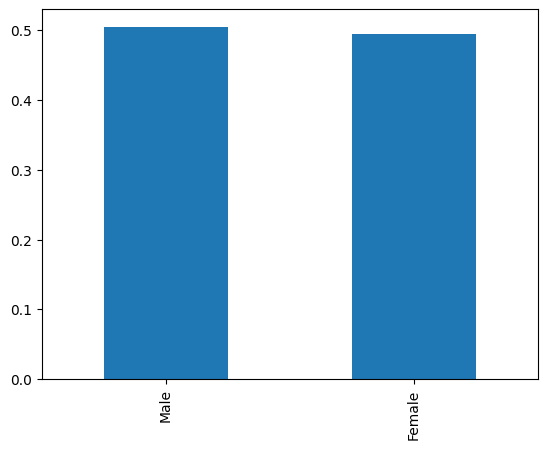

In [16]:
# bar plot
df['gender'].value_counts(normalize=True).plot(kind='bar')

Observation:  
* The number of male customers are greater than the female customers.
* The most of the customers who were using the services are males.
* From the bar plot, we can see the probability of whether the customer is male or female.
* There is no much variation in the probability that the customer is male and the probability that the customer is female.

**Analysis for SeniorCitizen:**

In [17]:
# calculate minimum value
print(df['SeniorCitizen'].min())

# calculate maximum value
print(df['SeniorCitizen'].max())

# calculate mean
print(df['SeniorCitizen'].mean())

# calculate median
print(df['SeniorCitizen'].median())




0
1
0.1621468124378816
0.0


<Axes: ylabel='Frequency'>

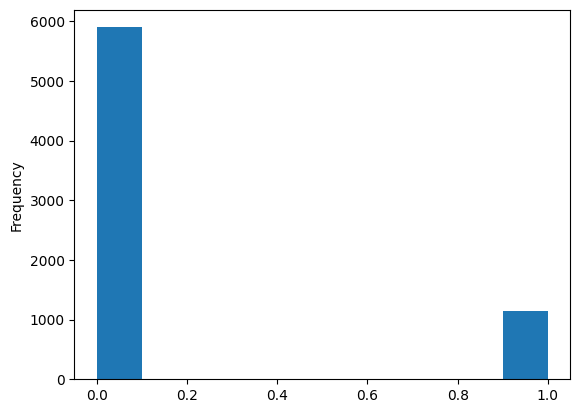

In [18]:
# plot the histogram
df['SeniorCitizen'].plot(kind='hist')

Observation:  
* "SeniorCitizen" column contains binary values (0 or 1) indicating whether a customer is a senior citizen or not.
* In this case, a value of 0 typically represents a non-senior customer, while a value of 1 represents a senior customer.
* We can see that the most of the customers are not senior citizens that is the count of non senior citizens is  very high than the count of senior citizens.
* Hence, we can understand that most of the customers who were accessing the services were not senior citizens.

**Analysis for Partner:**

In [19]:
# get the count of unique values in partner
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

<Axes: >

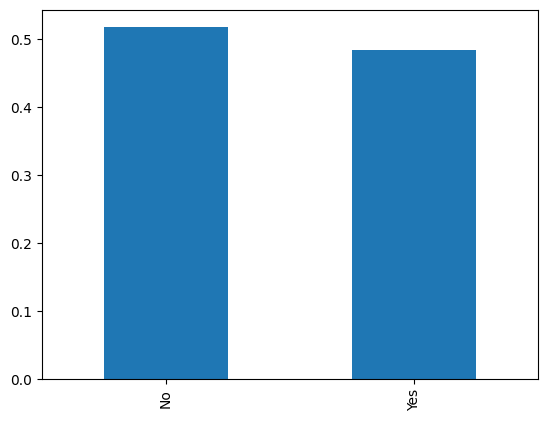

In [20]:
# bar plot
df['Partner'].value_counts(normalize=True).plot(kind='bar')

Observation:  
* The Partner column has two unique values yes or no.
* 'yes' represents that the customer is having a partner and 'no' represents that the customer does not have a partner.
* The count of no is greater than yes, hence most of the customers are most likely to be single or divorced.
* The bar plot shows the probability of  a customer having a partner and not having a partner.
* The probability of the customer not having a partner is higher than the probability of customer having a partner.

**Analysis for Dependents:**

In [21]:
# get the count of unique values in dependents
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

<Axes: >

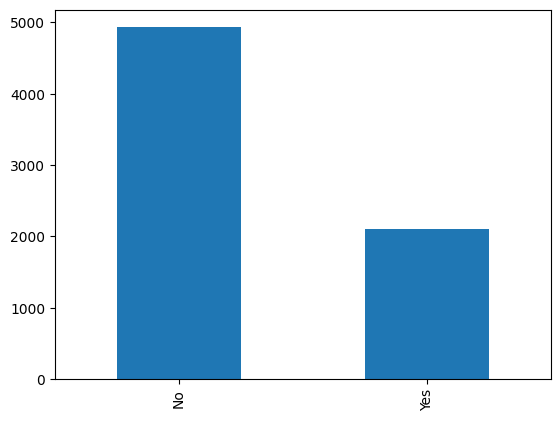

In [22]:
# bar plot
df['Dependents'].value_counts().plot(kind='bar')

Observation:  
* There are two unique values 'yes' and 'no' in Dependents.
* 'Yes' indicates that customer has dependents and 'No' indicates that customer does not have any dependents.
* The dependents can be either children or parents or other family memebers.
* The count of no is higher than the count of yes.
* The customers who are having dependents are more than the customers with no dependents.

**Analysis for tenure:**

In [23]:
# calculate minimum value
print(df['tenure'].min())

# calculate maximum value
print(df['tenure'].max())

# calculate mean
print(df['tenure'].mean())

# calculate median
print(df['tenure'].median())


0
72
32.37114865824223
29.0


<Axes: >

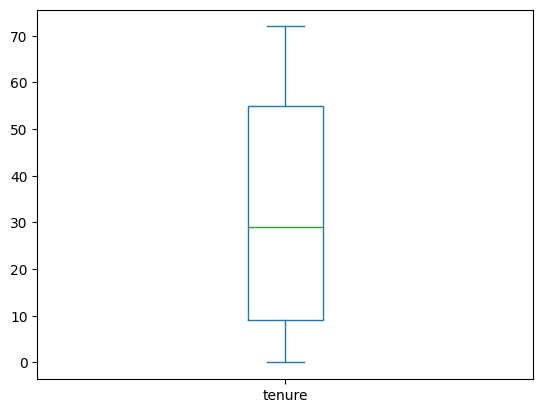

In [24]:
# box plot
df['tenure'].plot(kind='box')

<Axes: ylabel='Frequency'>

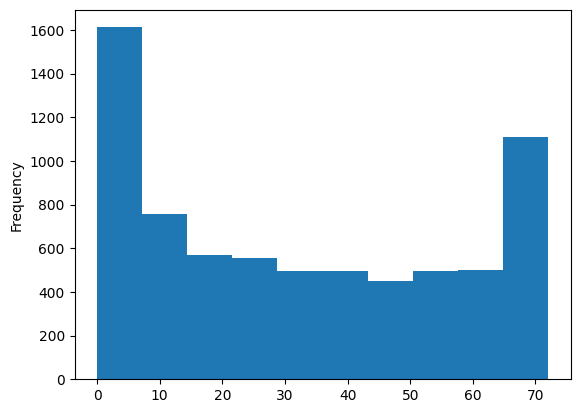

In [25]:
# plot the histogram
df['tenure'].plot(kind="hist")

Observation:  
* The "tenure" column typically represents the number of months a customer has been with a company or subscribed to a service.
* Each value in the sequence corresponds to the tenure of a specific customer.
* The minimum value in the tenure is 0 which indicates that the customer has joined the company recently.
* The maximum value is 72 which indicates that the customers has been accessing the services of the company since 72 months.
* On an average, the customers have subscribed the services of the company for 32 months.
* From the box plot we can see that the maximum distribution of values between 10 and 55 which indicates majority of the customers have the tenure period of 10 to 55 months.
* From the histogram, we can see that the maximum number of customers have subscribed to the services very recently.
* The second highest tenure period is of 65 to 72 months.
* We can determine whether the customer is a new customer or an old customer by looking at the tenure period.


**Analysis for PhoneService:**

In [26]:
# get the count of unique values in phone service
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

<Axes: >

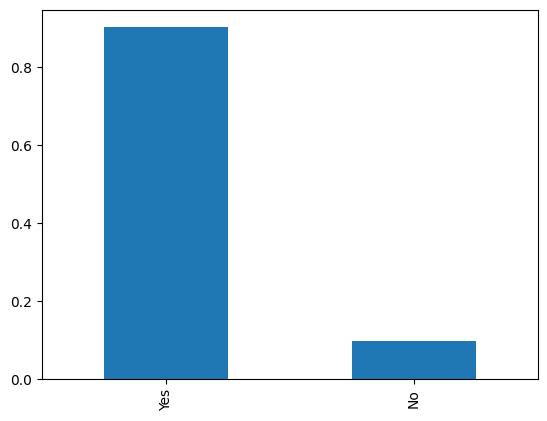

In [27]:
df['PhoneService'].value_counts(normalize=True).plot(kind='bar')

Observation:  
* There are two unique values  yes and no in PhoneService.
* Yes indicates that the customer has subscribed to the PhoneService. No means that the customer has not subscribed to the PhoneService.
* The count of Yes is higher than the count of No.
* Hence, we can say that most of the customers have signed up for PhoneService.
* From the above bar plot, we can say that there is a high probability that the customers have signed up for the PhoneService.

**Analysis for MultipleLines:**

In [28]:
# get the count of unique values in Multiple Lines
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

<Axes: >

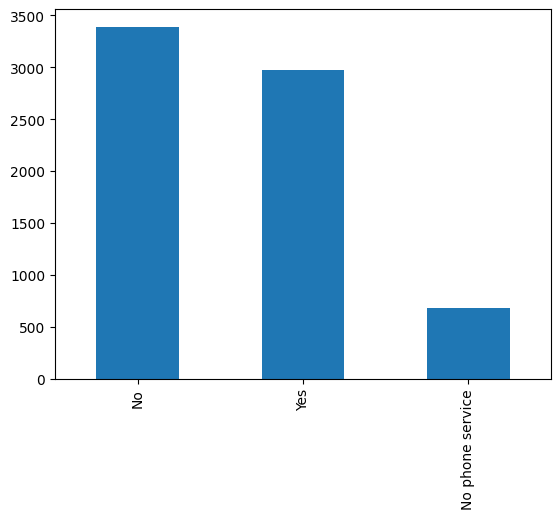

In [29]:
# bar plot
df['MultipleLines'].value_counts().plot(kind='bar')

Observation:  
* The "MultipleLines" column typically indicates whether a customer has multiple phone lines or services associated with their account.
* "No phone service" indicates that the customer does not have a phone service.
* "No" indicates that the customer does not have multiple phone lines.
* "Yes" indicates that the customer has multiple phone lines.
* The count of no is greater than yes and no phone service,hence maximum number of customers have not subcribed to MultipleLines service.
* The count of yes is greater than no phone service which indicates that the some of the customers have signed up for MultipleLines service.
* The minimum number of customers have not signed for the phone services.


**Analysis for InternetService:**

In [30]:
# get the count of unique values in Internet Service
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

<Axes: >

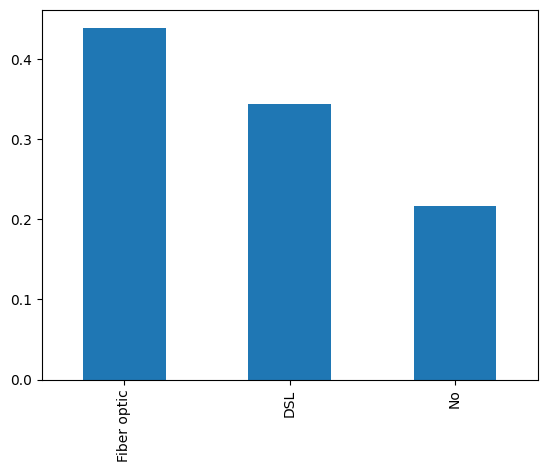

In [31]:
# bar plot
df['InternetService'].value_counts(normalize=True).plot(kind='bar')

Observation:  
* There are three unique values "Fiber optic","DSL","NO" in InternetService.
* Fiber optic and DSL indicate the type of internet service that has been subscribed by the customers.
* No indicates that customer has not subscribed for the internet service.
* The maximum number of customers subscribed for the internet service in that most of the customers prefered the Fibre Optic internet service compared to the DSL internet service.
* Minimum number of customers have not subscribed for the internet service.

**Analysis for OnlineSecurity:**

In [32]:
# get the count of unique values in Online Security
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<Axes: >

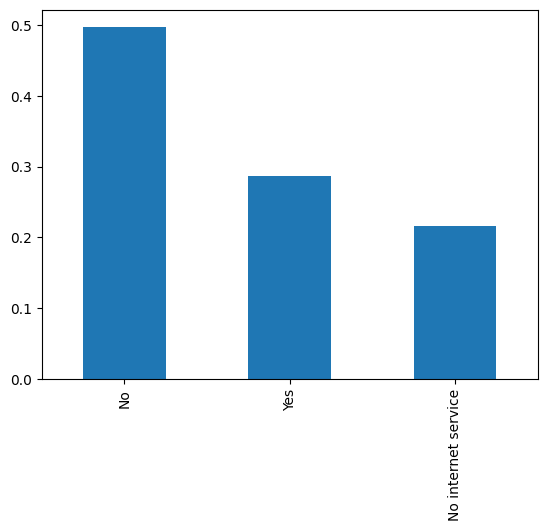

In [33]:
# bar plot
df['OnlineSecurity'].value_counts(normalize=True).plot(kind='bar')

Observation:  
* There are three unique values 'yes','no','No internet service' in the online security.
* yes and no indicate the customers  who have already signed up for the internet service and who have also signed up for online security or not.
* No internet service indicates that the customers have not signed up for the internet service.
* The count of No is higher than the count of yes and No internet service which indicates that the maximum number of customers have signed up for the internet service but not subscribed for the online security.
* The count of customers who have subscribed for both the internet service and online security is greater than the count of the customers who have not subscribed for the internet service.
* The minimum number of customers have not subscribed for the internet service.

**Analysis for OnlineBackup:**

In [34]:
# get the count of unique values in Online Backup
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

<Axes: >

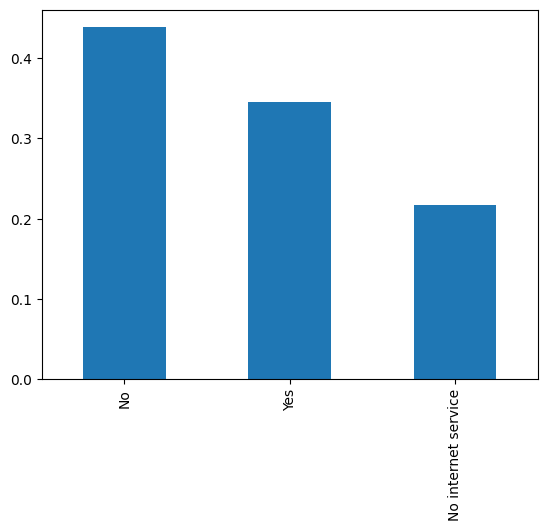

In [35]:
# bar plot
df['OnlineBackup'].value_counts(normalize=True).plot(kind='bar')

Observation:  
* There are three unique values 'yes','no','No internet service' in the online backup.
* yes and no indicate the customers  who have already signed up for the internet service and who have also signed up for online backup or not.
* No internet service indicates that the customers have not signed up for the internet service.
* The count of No is higher than the count of yes and No internet service which indicates that the maximum number of customers have signed up for the internet service but not subscribed for the online backup.
* The count of customers who have subscribed for both the internet service and online backup is greater than the count of the customers who have not subscribed for the internet service.
* The minimum number of customers have not subscribed for the internet service.

**Analysis for DeviceProtection:**

In [36]:
# get the count of unique values in Device Protection
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

<Axes: >

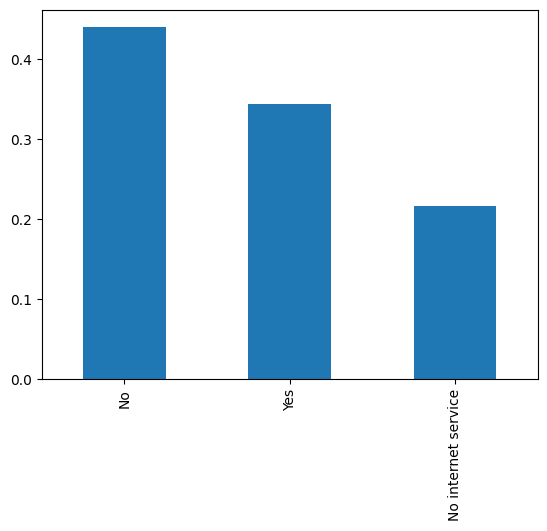

In [37]:
# bar plot
df['DeviceProtection'].value_counts(normalize=True).plot(kind='bar')

Observation:  
* There are three unique values 'yes','no','No internet service' in the Device Protection.
* yes and no indicate the customers  who have already signed up for the internet service and who have also signed up for Device Protection or not.
* No internet service indicates that the customers have not signed up for the internet service.
* The count of No is higher than the count of yes and No internet service which indicates that the maximum number of customers have signed up for the internet service but not subscribed for the Device Protection.
* The count of customers who have subscribed for both the internet service and Device Protection is greater than the count of the customers who have not subscribed for the internet service.
* The minimum number of customers have not subscribed for the internet service.

**Analysis for TechSupport:**

In [38]:
# get the count of unique values in Tech Support
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

<Axes: >

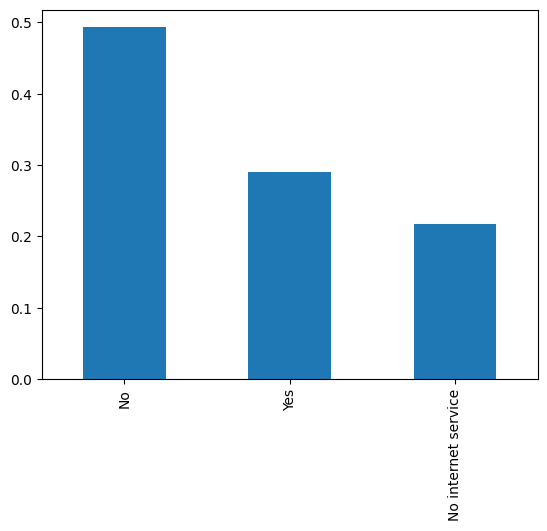

In [39]:
# bar plot
df['TechSupport'].value_counts(normalize=True).plot(kind='bar')

Observation:  
* There are three unique values 'yes','no','No internet service' in the Tech Support.
* yes and no indicate the customers  who have already signed up for the internet service and who have also signed up for Tech Support or not.
* No internet service indicates that the customers have not signed up for the internet service.
* The count of No is higher than the count of yes and No internet service which indicates that the maximum number of customers have signed up for the internet service but not subscribed for the Tech Support.
* The count of customers who have subscribed for both the internet service and Tech Support is greater than the count of the customers who have not subscribed for the internet service.
* The minimum number of customers have not subscribed for the internet service.

**Analysis for StreamingTV:**

In [40]:
# get the count of unique values in Streaming TV
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

<Axes: >

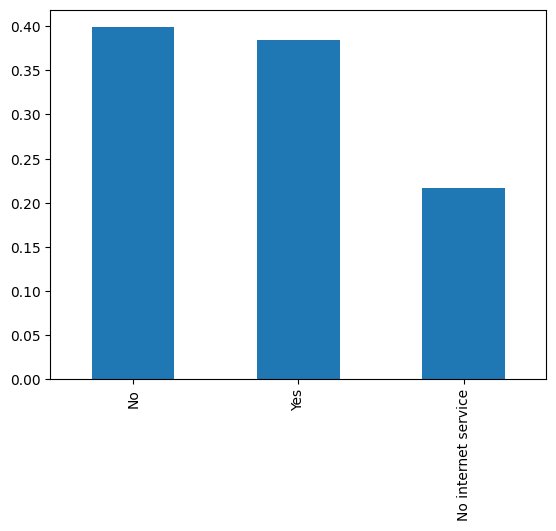

In [41]:
# bar plot
df['StreamingTV'].value_counts(normalize=True).plot(kind='bar')

Observation:  
* There are three unique values 'yes','no','No internet service in the Streaming TV.
* yes and no indicate the customers  who have already signed up for the internet service and who have also signed up for Streaming TV or not.
* No internet service indicates that the customers have not signed up for the internet service.
* The count of No is higher than the count of yes and No internet service which indicates that the maximum number of customers have signed up for the internet service but not subscribed for the Streaming TV.
* The count of customers who have subscribed for both the internet service and Streaming TV is greater than the count of the customers who have not subscribed for the internet service.
* The minimum number of customers have not subscribed for the internet service.

**Analysis for StreamingMovies:**

In [42]:
# get the count of unique values in Streaming Movies
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

<Axes: >

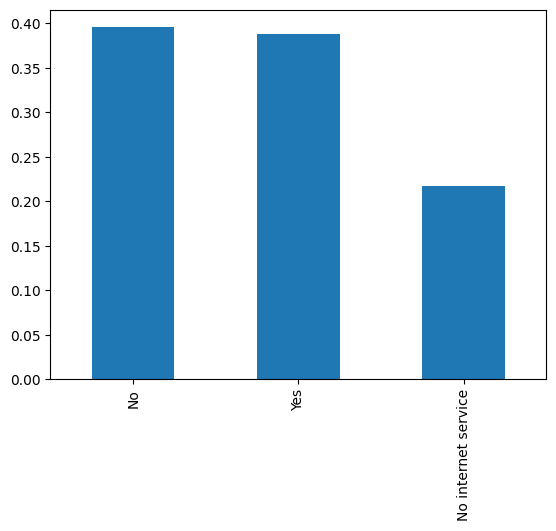

In [43]:
# bar plot
df['StreamingMovies'].value_counts(normalize=True).plot(kind='bar')

Observation:  
* There are three unique values 'yes', 'no', 'No internet service in the Streaming Movies.
* yes and no indicate the customers  who have already signed up for the internet service and who have also signed up for Streaming Movies or not.
* No internet service indicates that the customers have not signed up for the internet service.
* The count of No is higher than the count of yes and No internet service which indicates that the maximum number of customers have signed up for the internet service but not subscribed for the Streaming Movies.
* The count of customers who have subscribed for both the internet service and Streaming Movies is greater than the count of the customers who have not subscribed for the internet service.
* The minimum number of customers have not subscribed for the internet service.

**Analysis for Contract:**

In [44]:
# get the count of unique values in Contract
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

<Axes: >

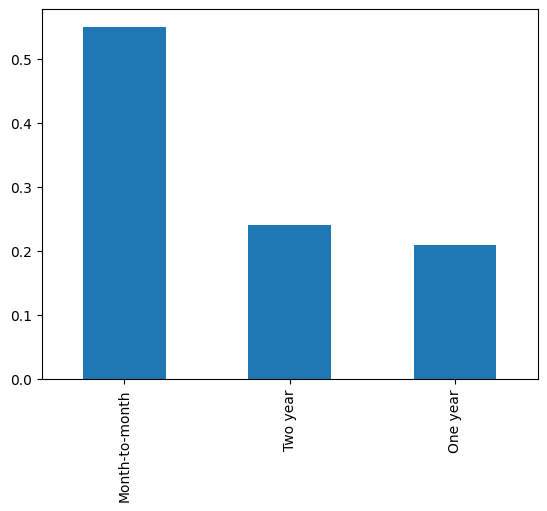

In [45]:
# bar plot
df['Contract'].value_counts(normalize=True).plot(kind='bar')

Observation:  
* There are three types of contract available which Month-to-Month,Two year and One year.
* Maximum number of customers preferred Month-to-Month contract compared to Two year and One year contract.
* Over Two year and One year contract, Two year contract was more preferred by the customers.
* Minimum number of customers preferred One year contract when compared to the others.
* We can understand the type of service validity being preferred by the customers.

**Analysis for PaperlessBilling:**

In [46]:
# get the count of unique values in Paperless Billing
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

<Axes: >

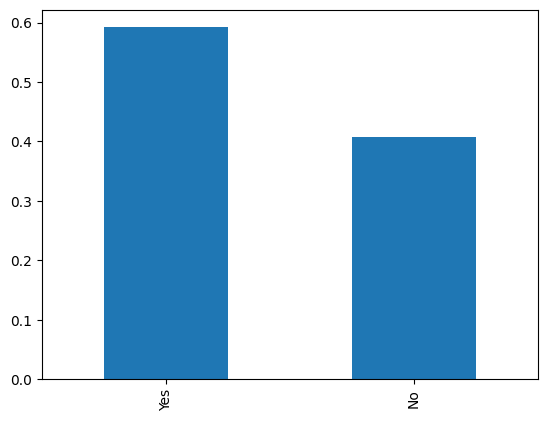

In [47]:
# bar plot
df['PaperlessBilling'].value_counts(normalize=True).plot(kind='bar')

Observation:  
* There are two unique values 'yes' and 'no' in paperless billing.
* yes indicates that the customers preferred paperless billing by paying the amount through e-payments services.
* No indicates that customers opted for paying throught cheques, drafts.
* Maximum number of customers opted for the paperless billing which would be less time consuming.
* Few customers opted for doing the payments without paperless billing.

**Analysis for PaymentMethod:**

In [48]:
# get the count of unique values in Payment Method
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

<Axes: >

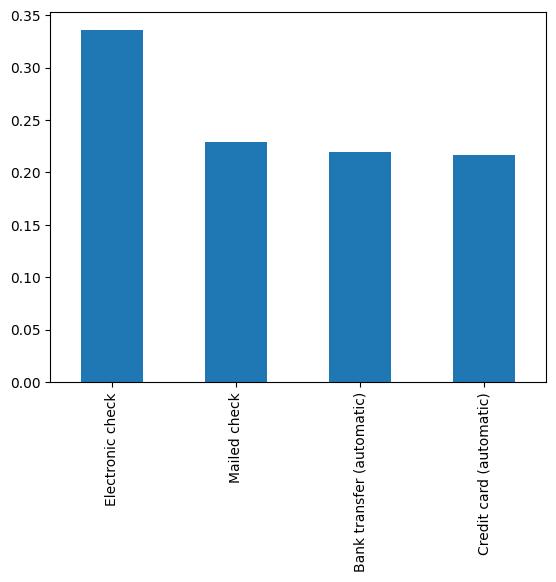

In [49]:
# bar plot
df['PaymentMethod'].value_counts(normalize=True).plot(kind='bar')

Observation:  
* There are four unique payment methods which were opted by the customers for making the payments.
* The maximum number of the customers preferred making payment with electronic check.
* The second option that was preferred by the customers was by mailed check.
* Minimum number of customers made the payment through automatic methods like bank transfer and credit card payment.
* Least number of customers opted for making the payment through credit card.
* We can understand the different payment options that were preferred by the customers.

**Analysis for MonthlyCharges:**

In [50]:
# calculate minimum value
print(df['MonthlyCharges'].min())

# calculate maximum value
print(df['MonthlyCharges'].max())

# calculate mean
print(df['MonthlyCharges'].mean())

# calculate median
print(df['MonthlyCharges'].median())


18.25
118.75
64.76169246059918
70.35


<Axes: >

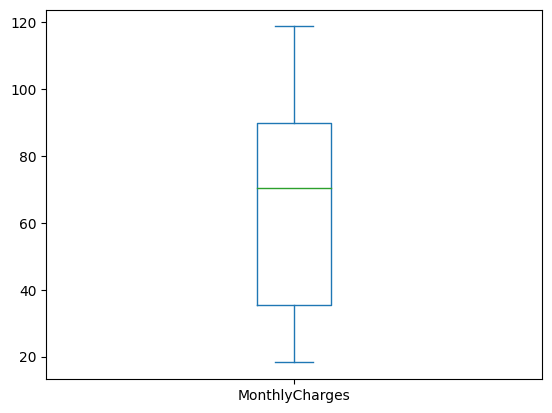

In [51]:
# box plot
df['MonthlyCharges'].plot(kind='box')

<Axes: ylabel='Frequency'>

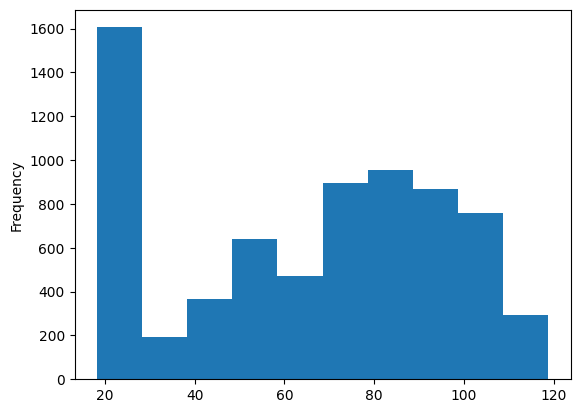

In [52]:
# histogram
df['MonthlyCharges'].plot(kind='hist')

Observation:  
* Monthly Charges is the amount charged for each customer on every month.
* The minimum monthly charge is 18.25 .
* On an average, the amount of 64.76 is charged on the customer.
* The maximum monthly charges paid by the customer is 118.75 .
* From the box plot, we can see that there are no outliers in the data.
* The majority of the customers have their monthly charges less than the average monthly charges.
* From the histogram, we can see that the maximum number of the customers have their monthly charges between 18 to 35.
* Very few customers have their monthly charges greater than 100.

**Analysis for TotalCharges:**

In [53]:
# calculate minimum value
print(df['TotalCharges'].min())

# calculate maximum value
print(df['TotalCharges'].max())

# calculate mean
print(df['TotalCharges'].mean())

# calculate median
print(df['TotalCharges'].median())

18.8
8684.8
2281.9169281556156
1397.475


<Axes: >

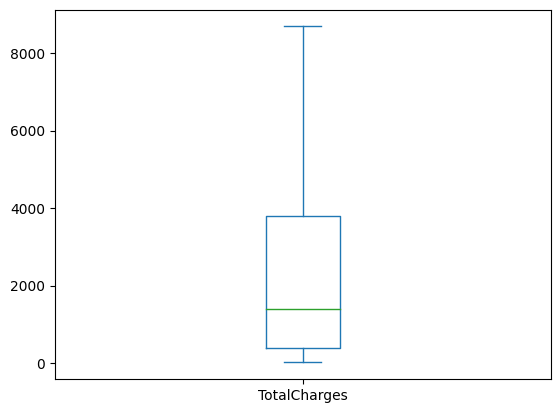

In [54]:
# box plot
df['TotalCharges'].plot(kind='box')

<Axes: ylabel='Frequency'>

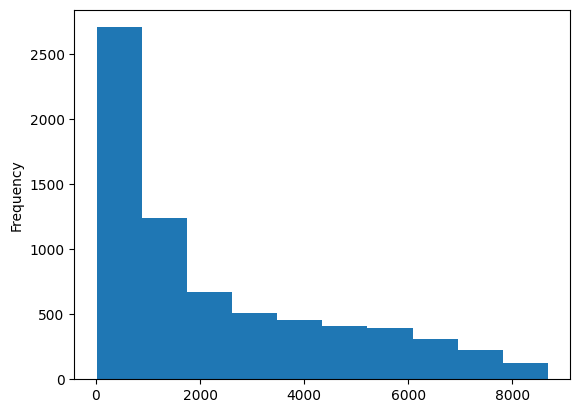

In [55]:
# histogram
df['TotalCharges'].plot(kind='hist')

Observation:  
* Total charges encompass the cumulative sum of all charges over a specified tenure period, including both recurring and one-time fees.
* The minimum total charge is 18.8 which indicates that customer subscribed the services for a period of maximum of one month.
* The maximum total charges is 8684.8 which indicates that the customer have been accessing the services for a long period or subscribed for many services.
* The distribution of majority of customers total charges is between 18 to 4000.
* The maximum number of customers have their total charges from 18 to 1000 which indicates that customers have subscribed the services for few months or subscribed for few services.
* The minimum number of customers have their total charges beyond 8000 which indicates that they have subscribed the services for a longer period.

**Analysis for Churn:**

In [56]:
# get the count of unique values in Churn
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<Axes: >

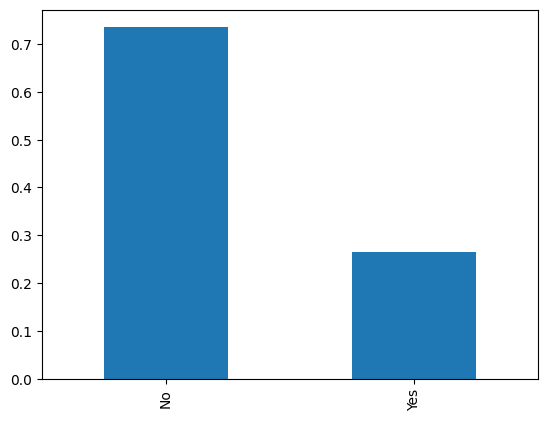

In [57]:
# bar plot
df['Churn'].value_counts(normalize=True).plot(kind='bar')

Observation:  
* There are two unique values 'yes' and 'no' in churn.
* The yes in churn indicates that the customers are more likely to discontinue the services or subscription with the service provider.
* The no in churn indicates that the customers are likely to continue with subscribing the services from the service provider.
* We can see that the maximum number of customers opted for yes, hence they are likely to be continuing their subscription or their services.
* Minimum number of customers opted for no, hence they are more likely to be discontinuing the services from their service provider.
* By this we can understand whether the customers are satisfied and whether they are going to continue accessing the services or proceed to other service providers.

# Bivariate Analysis:

**Analysis for Gender and Churn:**

In [58]:
import matplotlib.pyplot as plt

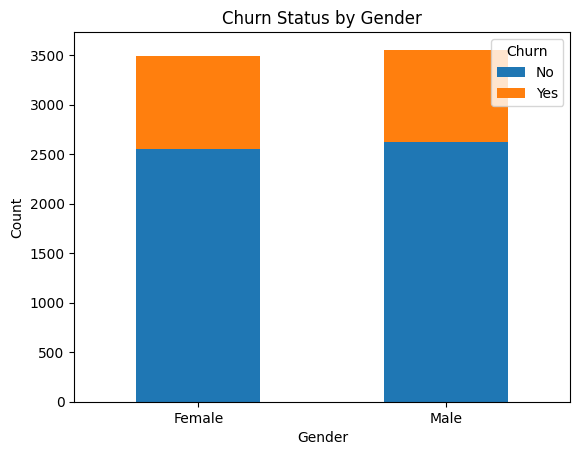

In [59]:
# Calculate the count of churn status for each gender
churn_counts = df.groupby(['gender', 'Churn']).size().unstack()

# Create a stacked bar chart
churn_counts.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Status by Gender')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()


Observation:  
* From the plot we can observe how gender and churn are related to each other.
* The count of males is slightly greater than females,the number of male customers are greater than females.
* The majority of male and female customers are likely to continue with their subscriptions.
* Minimum number of both male and female customers are likely to discontinue with the current service provider.

**Analysis for Senior Citizen and Churn:**

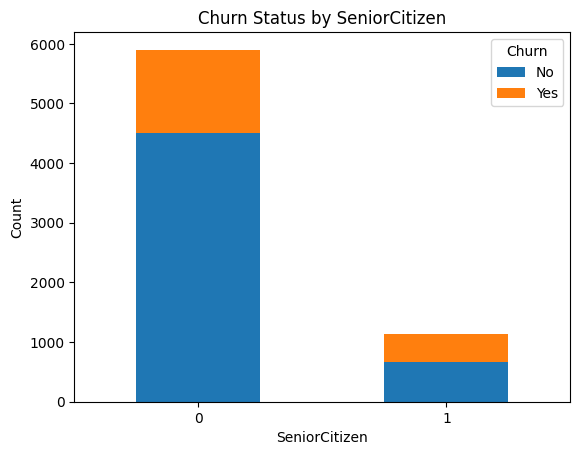

In [60]:
# Calculate the count of churn status for each Senior Citizen
churn_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Create a stacked bar chart
churn_counts.plot(kind='bar', stacked=True)
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')
plt.title('Churn Status by SeniorCitizen')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()

Observation:  
* From the above we can observe the relation between Senior citizen and the churn.
* Maximum number of customers are not senior citizens, their age is less than 60.
* The maximum number of customers who are not senior citizens they are most likely to continue with the services of the service provider.
* Minimum number of non senior citizen customers are likely to discontinue their subscriptions.
* There are few customers who are senior citizens where majority of them are going to continue with their services.
* Minimum number of senior citizens are likely to discontinue their services or their subscriptions.

**Analysis for Partner:**

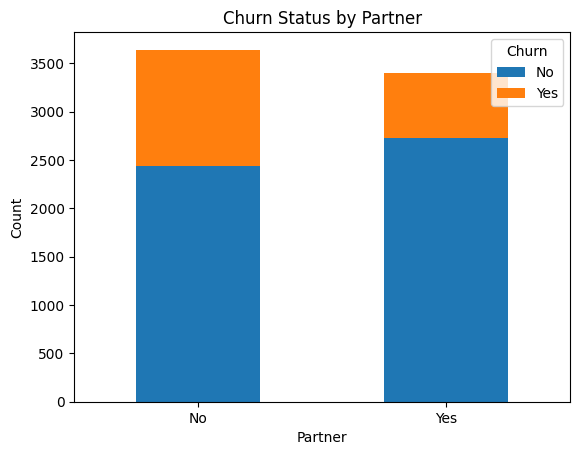

In [61]:
# Calculate the count of churn status for each customer having or not having a partner
churn_counts = df.groupby(['Partner', 'Churn']).size().unstack()

# Create a stacked bar chart
churn_counts.plot(kind='bar', stacked=True)
plt.xlabel('Partner')
plt.ylabel('Count')
plt.title('Churn Status by Partner')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()

Observation:  
* From the above plot, we can see how the churn status is related to a customer having a partner.
* The customers who have partner are less than the customers who don't have  a partner.
* In both the cases, the maximum number of customers are likely to be continuing their subscriptions.
* Very few customers are likely are to churn irrespective of whether they have a partner or not.
* Hence we can say that customers having a partner is more likely to not to affect the churn.

**Analysis for Dependents and Churn:**

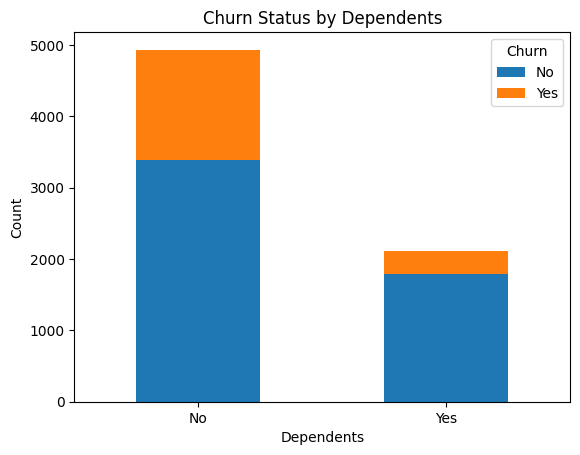

In [62]:
# Calculate the count of churn status for each customer having dependents
churn_counts = df.groupby(['Dependents', 'Churn']).size().unstack()

# Create a stacked bar chart
churn_counts.plot(kind='bar', stacked=True)
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Churn Status by Dependents')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()

Observation:  
* From the above plot, we can see that the maximum number of customers do not have dependents,only few number of customers have dependents.
* Most of the customers in the both the cases, irrespective of the dependents are most likely to not to churn.
* The customers having or not having the dependents is not going to affect the churn.

**Analysis for tenure and churn:**

<Axes: title={'center': 'tenure'}, xlabel='Churn'>

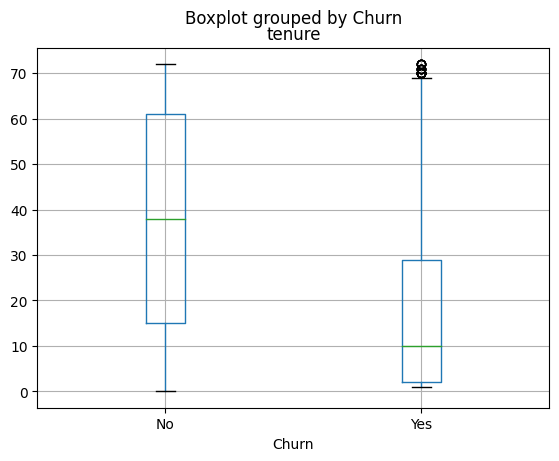

In [63]:
# box plot to find the relation between churn status and tenure
df.boxplot(by='Churn',column='tenure')

Observation:  
* From the plot,we can determine the relation between tenure period of the customer and churn.
* The customers who have been accessing their subscription for a tenure period of 15 to 62 months are not going to churn.
* The customers who have the tenure period of 2 to 30 months are most likely to churn, They are going to discontinue their subscriptions.
* There are few outliers in yes which indicates that there are  few customers with the highest tenure period of greater than 70 and are going to discontinue their services.
* The maximum value of tenure period of customers who have opted for no churn is higher than the maximum value of the customers who have opted to churn.
* The tenure period of the customers who have no as the churn status is greater than the tenure period of customers who have churn status as yes.
* The tenure period is an important factor which influences the churn status.

**Analysis for PhoneService and Churn:**

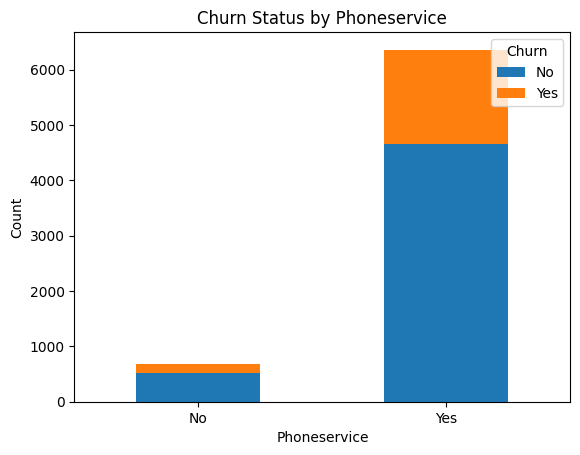

In [64]:
# Calculate the count of churn status and phone service status
churn_counts = df.groupby(['PhoneService', 'Churn']).size().unstack()

# Create a stacked bar chart
churn_counts.plot(kind='bar', stacked=True)
plt.xlabel('Phoneservice')
plt.ylabel('Count')
plt.title('Churn Status by Phoneservice')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()

Observation:  
* From the above plot, we can see the relation between phone service and churn status.
* There more than 6000 customers using phone service and the customers who have not signed up for phone service are less than 1000.
* The maximum number of customers irrespective of the phone service have opted for no in churn status.
* The maximum number of the customers are not going to churn even though they have subscribed for phone service or not.
* Hence we can say that churn status is not being affected by the usage of the phone service.

**Analysis for InternetService and Churn:**

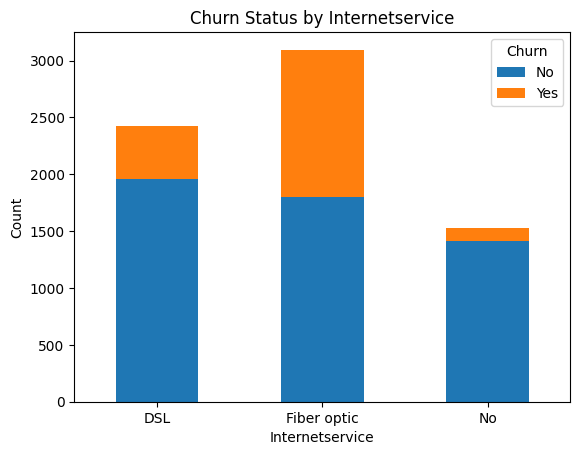

In [65]:
# Calculate the count of churn status and internet service status
churn_counts = df.groupby(['InternetService', 'Churn']).size().unstack()

# Create a stacked bar chart
churn_counts.plot(kind='bar', stacked=True)
plt.xlabel('Internetservice')
plt.ylabel('Count')
plt.title('Churn Status by Internetservice')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()

Observation:  
* From the above plot, we can see the relation between Churn status and the internet service.
* The customers who have subscribed for the internet service were using two types of internet service DSL and Fiber optic.
* The number of Fiber optic internet service users are greater than the DSL internet service users.
* The count of the DSL users who are not going to churn is greater than the count of the Fibre optic users who are not going to churn.
* We can say that DSL users are more satisfied with the service compared to the Fibre optic users.
* The major number of customers who have not subscribed for the internet service may be satisfied with the other services as most of them are not going to churn.


**Analysis for OnlineSecurity and Churn Rate:**

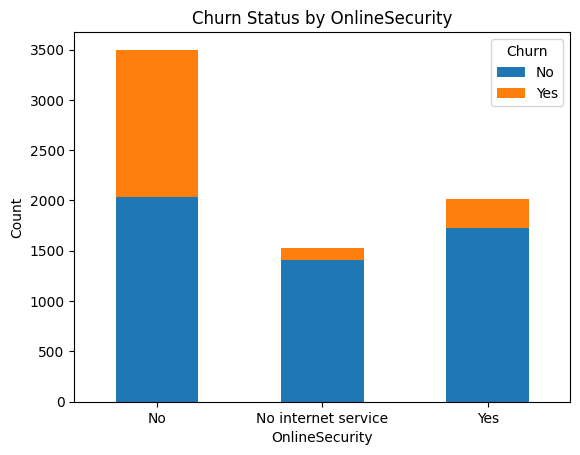

In [66]:
# Calculate the count of churn status and online security service status
churn_counts = df.groupby(['OnlineSecurity', 'Churn']).size().unstack()

# Create a stacked bar chart
churn_counts.plot(kind='bar', stacked=True)
plt.xlabel('OnlineSecurity')
plt.ylabel('Count')
plt.title('Churn Status by OnlineSecurity')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()

Observation:  
* From the above plot, we can see the relation between Online security and churn status.
* Online Security can be subcribed by the customers who have opted for the internet service.
* Among the internet service users, maximum number of users have not chosen online security.
* The most of the customers who have subcribed for online security are likely to not to churn.
* The most of the customers who have not subcribed for online security are likely to not to churn.
* The customers who have not subscribed for the internet service are more likely to not to churn.
* Hence we can say that the customers who rely on the online security service are less likely to churn.

**Analysis for OnlineBackup and Churn status:**

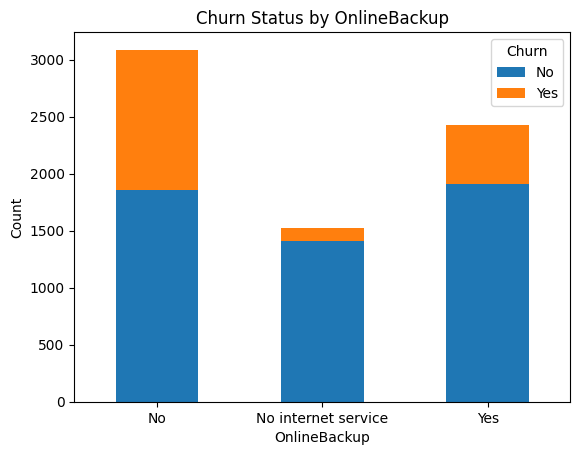

In [67]:
# Calculate the count of churn status and online Backup service status
churn_counts = df.groupby(['OnlineBackup', 'Churn']).size().unstack()

# Create a stacked bar chart
churn_counts.plot(kind='bar', stacked=True)
plt.xlabel('OnlineBackup')
plt.ylabel('Count')
plt.title('Churn Status by OnlineBackup')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()

Observation:  
* From the above plot, we can see the relation between online backup service and churn status.
* Online backup service would be allowed for the users who have subscribed for the internet service.
* Among the users who have subscribed for internet service, the count of users who have not subscribed for online backup is greater than the count of users who have subscribed for online backup.
* The maximum number of users who have subscribed for online backup are less likely to churn when compared to the other users.
* The maximum of users who have not subscribed for online backup and internet service are also less likely to churn.

**Analysis for DeviceProtection and Churn status:**

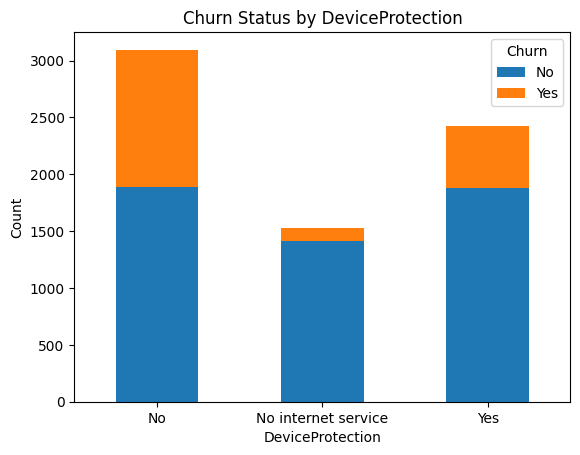

In [68]:
# Calculate the count of churn status and Device Protection service status
churn_counts = df.groupby(['DeviceProtection', 'Churn']).size().unstack()

# Create a stacked bar chart
churn_counts.plot(kind='bar', stacked=True)
plt.xlabel('DeviceProtection')
plt.ylabel('Count')
plt.title('Churn Status by DeviceProtection')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()

Observation:  
* From the above plot,we can see the relation between Device protection service and the churn.
* Device protection service would be allowed for the users who have subscribed for the internet service.
* Among the users who have subscribed for internet service, the count of users who have not subscribed for device protection is greater than the count of users who have subscribed for device protection.
* The maximum number of users who have subscribed for device protection are less likely to churn when compared to the other users.
* The maximum of users who have not subscribed for device protection and internet service are also less likely to churn.

**Analysis for TechSupport and Churn:**

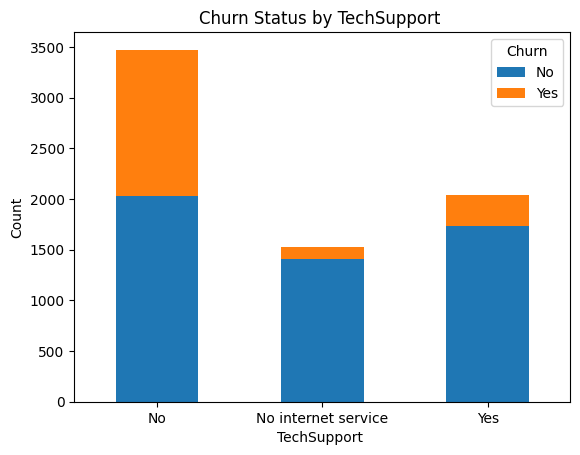

In [69]:
# Calculate the count of churn status and TechSupport  service status
churn_counts = df.groupby(['TechSupport', 'Churn']).size().unstack()

# Create a stacked bar chart
churn_counts.plot(kind='bar', stacked=True)
plt.xlabel('TechSupport ')
plt.ylabel('Count')
plt.title('Churn Status by TechSupport ')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()

Observation:  
* From the above plot, we can see the relation between Tech support and churn status.
* The tech support would be accessible by the customers who have subscribed for the internet service.
* Among the internet service users most of them have not subscribed for the tech support.
* The maximum number of users who have not signed up for tech support are less likely to churn compared to the tech support subscribed users.
* Most of the non internet service users are also less likely to churn.

**Analysis for StreamingTV and the churn:**

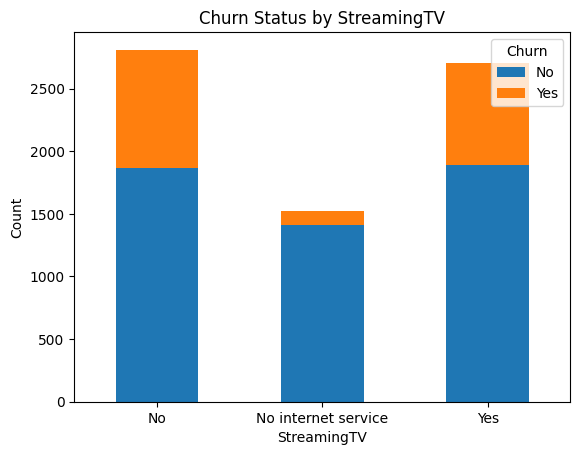

In [70]:
# Calculate the count of churn status and StreamingTV service status
churn_counts = df.groupby(['StreamingTV', 'Churn']).size().unstack()

# Create a stacked bar chart
churn_counts.plot(kind='bar', stacked=True)
plt.xlabel('StreamingTV')
plt.ylabel('Count')
plt.title('Churn Status by StreamingTV')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()

Observation:  
* From the above plot, we can see the relation between Streaming TV service and churn status.
* The Streaming TV would be an add on service along with the internet service.
* Among the internet service users, equivalent percentage of users have opted and not opted for the streaming tv service.
* Maximum percentage of users who have subscribed for streaming tv and not subscribed for streaming tv are less likely to churn. 
* The maximum number of no internet service users are also less likely to churn.

**Analysis for StreamingMovies and Churn:**

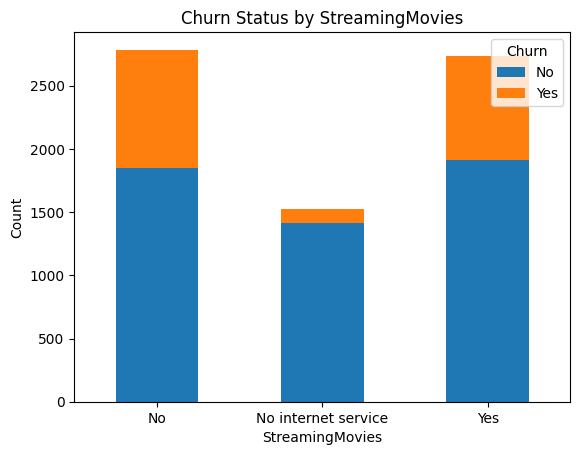

In [71]:
# Calculate the count of churn status and StreamingMovies service status
churn_counts = df.groupby(['StreamingMovies', 'Churn']).size().unstack()

# Create a stacked bar chart
churn_counts.plot(kind='bar', stacked=True)
plt.xlabel('StreamingMovies')
plt.ylabel('Count')
plt.title('Churn Status by StreamingMovies')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()

Observation:  
* From the above plot, we can see the relation between Streaming Movies service and churn status.
* The Streaming Movies would be an add on service along with the internet service.
* Among the internet service users, equivalent percentage of users have opted and not opted for the streaming Movies service.
* Maximum percentage of users who have subscribed for streaming Movies and not subscribed for streaming Movies are less likely to churn. 
* The maximum number of no internet service users are also less likely to churn.

**Analysis for Contract and Churn:**

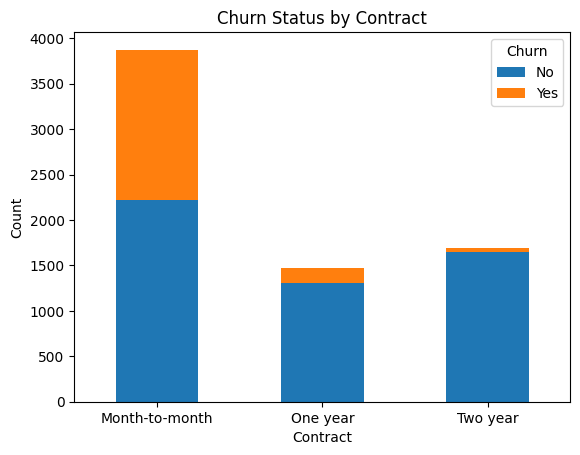

In [72]:
# Calculate the count of churn status and Contract 
churn_counts = df.groupby(['Contract', 'Churn']).size().unstack()

# Create a stacked bar chart
churn_counts.plot(kind='bar', stacked=True)
plt.xlabel('Contract')
plt.ylabel('Count')
plt.title('Churn Status by Contract')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()

Observation:  
* From the above plot we can find the relation between Contract and the Churn.
* There are three types of contract that the customers can choose according to their preference.
* We can see that the most of the customers have preferred for Month-to-Month subscription followed by Two year and one year subcriptions.
* In the month-to-month contract there is no much variation in the count of users who are likely to churn and not likely to churn.
* In one year and two year contract users maximum number of users are less likely to churn.
* We can understand that the customers are more satisfied with one year and two year subscription services compared to the month to month subscription users.

**Analysis for PaperlessBilling and Churn:**

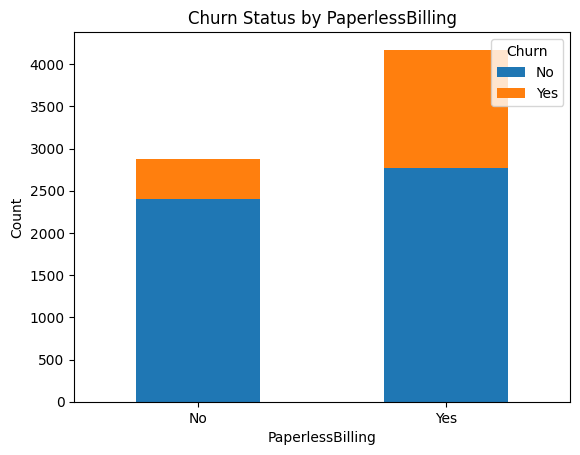

In [73]:
# Calculate the count of churn status and PaperlessBilling service status
churn_counts = df.groupby(['PaperlessBilling', 'Churn']).size().unstack()

# Create a stacked bar chart
churn_counts.plot(kind='bar', stacked=True)
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')
plt.title('Churn Status by PaperlessBilling')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()

Observation:  
* From the above plot we can find the relation between Paperless billing and Churn.
* Most of the customers have opted for paperless billing.
* The maximum number of customers who have chosen paperless billing and not chosen the paperless billing are less likely to churn.
* The percentage of users who are less likely to churn is high in the case of the users who have not opted for paperless billing compared to the users who opted for paperless billing.
* There might be some issues being faced by the customers due to paperless billing when resolved  may decrease the churn rate.

**Analysis for PaymentMethod and Churn:**

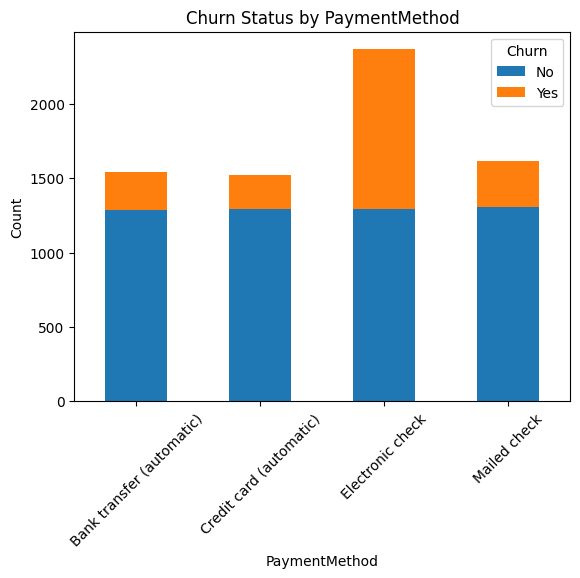

In [75]:
# Calculate the count of churn status and PaymentMethods
churn_counts = df.groupby(['PaymentMethod', 'Churn']).size().unstack()

# Create a stacked bar chart
churn_counts.plot(kind='bar', stacked=True)
plt.xlabel('PaymentMethod')
plt.ylabel('Count')
plt.title('Churn Status by PaymentMethod')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.show()

Observation:  
* From the above plot, we can find the relation between Payment method and churn status.
* There are four payment methods availabe for the users to make payments.
* Among them the most preferred method is Electronic check method.
* Maximum number of users who have done the payments through these methods are less likely to churn.
* In the electronic check payment method, the count of users who have their churn status as yes is not much less than the count of users who have their churn status as no.
* Customers might be facing some issues with making payment through electronic check which shows the increase in churn rate compared to other methods.

**Analysis for MonthlyCharges and Churn:**

<Axes: title={'center': 'MonthlyCharges'}, xlabel='Churn'>

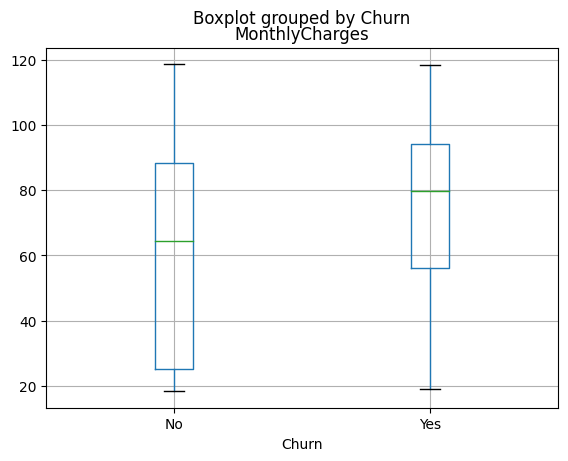

In [76]:
# box plot to find the relation between churn status and monthly charges
df.boxplot(by='Churn',column='MonthlyCharges')

Observation:  
* From the above plot, we can find the relation between the monthly charges and the churn.
* The maximum number of customers who have their monthly charges from 22 to 85 are less likely to churn.
* The customers who have their monthly charges from 58 to 95 are more likely to churn.
* Those customers who are more likely to churn may be facing some issues with the services which led to increase in the churn rate.

**Analysis for TotalCharges and Churn:**

<Axes: title={'center': 'TotalCharges'}, xlabel='Churn'>

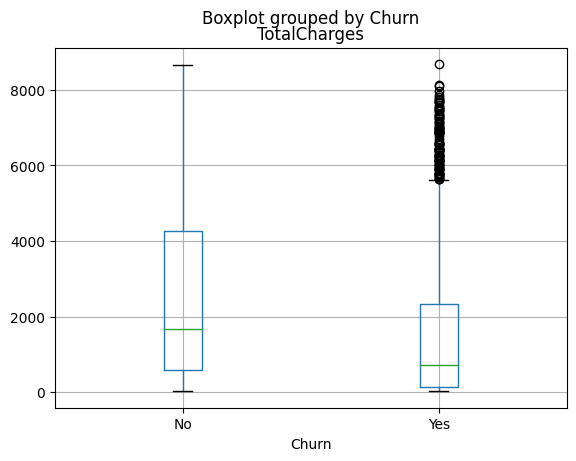

In [77]:
# box plot to find the relation between churn status and total charges
df.boxplot(by='Churn',column='TotalCharges')

Observation:  
* From the above plot, we can find the relation between the total charges and the churn.
* Maximum number of users have their total charges in the range of 18 to 4000.
* These customers are less likely to churn.
* Few customers have their total charges from 18 to 2200 are more likely to churn.
* There are some outliers where the churn status is yes which shows that these customers have higher total charges greater than 5000 and there are also the customers with total charges greater than 8000.
* Those customers with high total charges might be using the services from a long time which shows that customers might not be satisfied with the services which led to the increase in the churn rate.

# Insights:

Based on the provided observations, here's a final conclusion on the relationship between various features and churn status:

* Gender: The majority of both male and female customers are likely to continue with their subscriptions. There is no significant difference in churn rates between genders. Therefore, gender does not appear to be a strong factor influencing churn.

* Senior Citizenship: The majority of customers are not senior citizens (age less than 60) and are more likely to continue with the services. Among senior citizens, most of them are also likely to continue with their services, while a small number of senior citizens are likely to discontinue their subscriptions. However, the overall impact of senior citizenship on churn is relatively minor compared to other factors.

* Partner: Having a partner does not seem to have a significant impact on churn.

* Dependents: Having or not having dependents does not appear to significantly affect churn.

* Tenure: Customers with longer tenure are less likely to churn, while those with shorter tenure are more likely to churn. Tenure is an important factor influencing churn.

* Phone Service: The usage of phone service does not seem to have a significant impact on churn.

* Internet Service: DSL users have lower churn rates compared to fiber optic users. Customers without internet service also have lower churn rates.

* Online Security: Customers who have subscribed to online security services are less likely to churn.

* Online Backup: Customers who have subscribed to online backup services are less likely to churn.

* Device Protection: Customers who have subscribed to device protection services are less likely to churn.

* Tech Support: The availability of tech support does not seem to have a significant impact on churn.

* Streaming TV and Streaming Movies: Subscribing to these services does not appear to have a significant impact on churn.

* Contract: Customers with one-year and two-year contracts have lower churn rates compared to month-to-month subscribers.

* Paperless Billing: Customers who have opted for paperless billing have slightly higher churn rates compared to those who have not.

* Payment Method: The choice of payment method does not seem to have a significant impact on churn.

* Monthly Charges: Customers with lower monthly charges are less likely to churn, while those with higher monthly charges are more likely to churn.

* Total Charges: Customers with moderate total charges are less likely to churn. However, some outliers with high total charges may also be more likely to churn.

In summary, factors such as tenure, internet service type, additional services (online security, online backup, device protection), contract type, and monthly charges can significantly influence churn rates. However, while there may be slight variations in churn rates based on gender and senior citizenship, these factors alone do not have a strong influence on churn. Other factors like having a partner, dependents, phone service, and payment method do not seem to have a significant impact on churn.





# Recommendations:

Based on the Insights drawn from the observations, here are some recommendations for reducing churn:

* Improve Customer Onboarding: Since customers with shorter tenure are more likely to churn, focus on providing a positive onboarding experience to new customers. Offer personalized guidance, assistance, and resources to help them understand and make the most of your services.

* Enhance Internet Service Experience: Pay attention to the needs and satisfaction levels of customers using fiber optic internet service. Identify and address any issues or concerns they may have to improve their overall experience. Additionally, consider offering incentives or promotions to encourage customers without internet service to consider subscribing, as they have lower churn rates.

* Promote Additional Services: Emphasize the benefits and value of additional services such as online security, online backup, and device protection. These services have been shown to reduce churn, so market them effectively and highlight how they can enhance the customer's experience and protect their data.

* Long-Term Contracts: Encourage customers to opt for longer-term contracts (one-year or two-year) by offering incentives such as discounted pricing or additional benefits. These contracts have lower churn rates compared to month-to-month subscriptions, indicating that customers value stability and commitment.

* Address Paperless Billing Concerns: Investigate the reasons behind the slightly higher churn rates among customers who have opted for paperless billing. Address any issues or challenges they may be facing, such as difficulties in understanding or managing electronic bills. Provide clear communication, support, and user-friendly interfaces to improve the paperless billing experience.

* Optimize Pricing Strategies: Analyze the relationship between monthly charges and churn rates. Consider adjusting pricing plans to align with customer preferences and market conditions. Find a balance between competitive pricing and maintaining sustainable revenue while ensuring customers perceive the value in the services they receive.

* Proactive Customer Support: While tech support does not significantly impact churn, consider providing proactive support and resources to address common customer concerns or technical issues. This can help improve customer satisfaction and reduce the likelihood of churn.

* Analyze High Total Charges: Investigate the outliers with high total charges who are more likely to churn. Determine the reasons behind their dissatisfaction and explore potential solutions to address their concerns. This could involve reviewing pricing structures, offering tailored packages, or providing additional value-added services.

* Regularly monitoring the churn rates, conducting customer surveys, and gathering feedback would be useful to continuously improve the services and retain customers.